#  Temporal Data


---
<br>  

__Description__: 
- Quality Control of Data Map Structure.  

---
__Input__: 
- Parameters: volume, region, and duration. [See map for volume and region](https://hdsc.nws.noaa.gov/hdsc/pfds/pfds_temporal.html).

- *DataRepository* directory which contains the following:
    - The <u> *Temporal_Distributions* </u> directory, containing precipitation temporal distribution data broken down by quartile for the specified volume, region, and duration.

    - The *Temporal_Distribution_Data_Map.json* which contains metadata used to extract the temporal distribution data from its csv file.

    - The *Temporal_Quartile_Ranks.xlsx* which contains the percentage of precipitation events whose temporal distributions are represented by those in each quartile and documtentation on this can be found [here](https://www.nws.noaa.gov/oh/hdsc/currentpf.html).
---
__Output__: 
- Tabular summary of all possible combinations of metadata and associated plots.
---



#### Initialize Libraries

In [1]:
import sys
sys.path.append('../../../../core')
from hydromet import *
from hydromet_plotter import *

#### Initialize Paths

In [2]:
data_dir = pl.Path.cwd().parents[0]
datamap = 'Temporal_Distribution_Data_Map.json'
qranks = 'Temporal_Quartile_Ranks.xlsx'
temporals = data_dir / 'Temporal_Distributions'

#### Initialize Parameters

In [3]:
parameters = {'volume':[3],'region':[1],'duration':[6, 12, 24, 96]}

display_print = False
display_plots = True

#### Visualize Temporal Precipitations

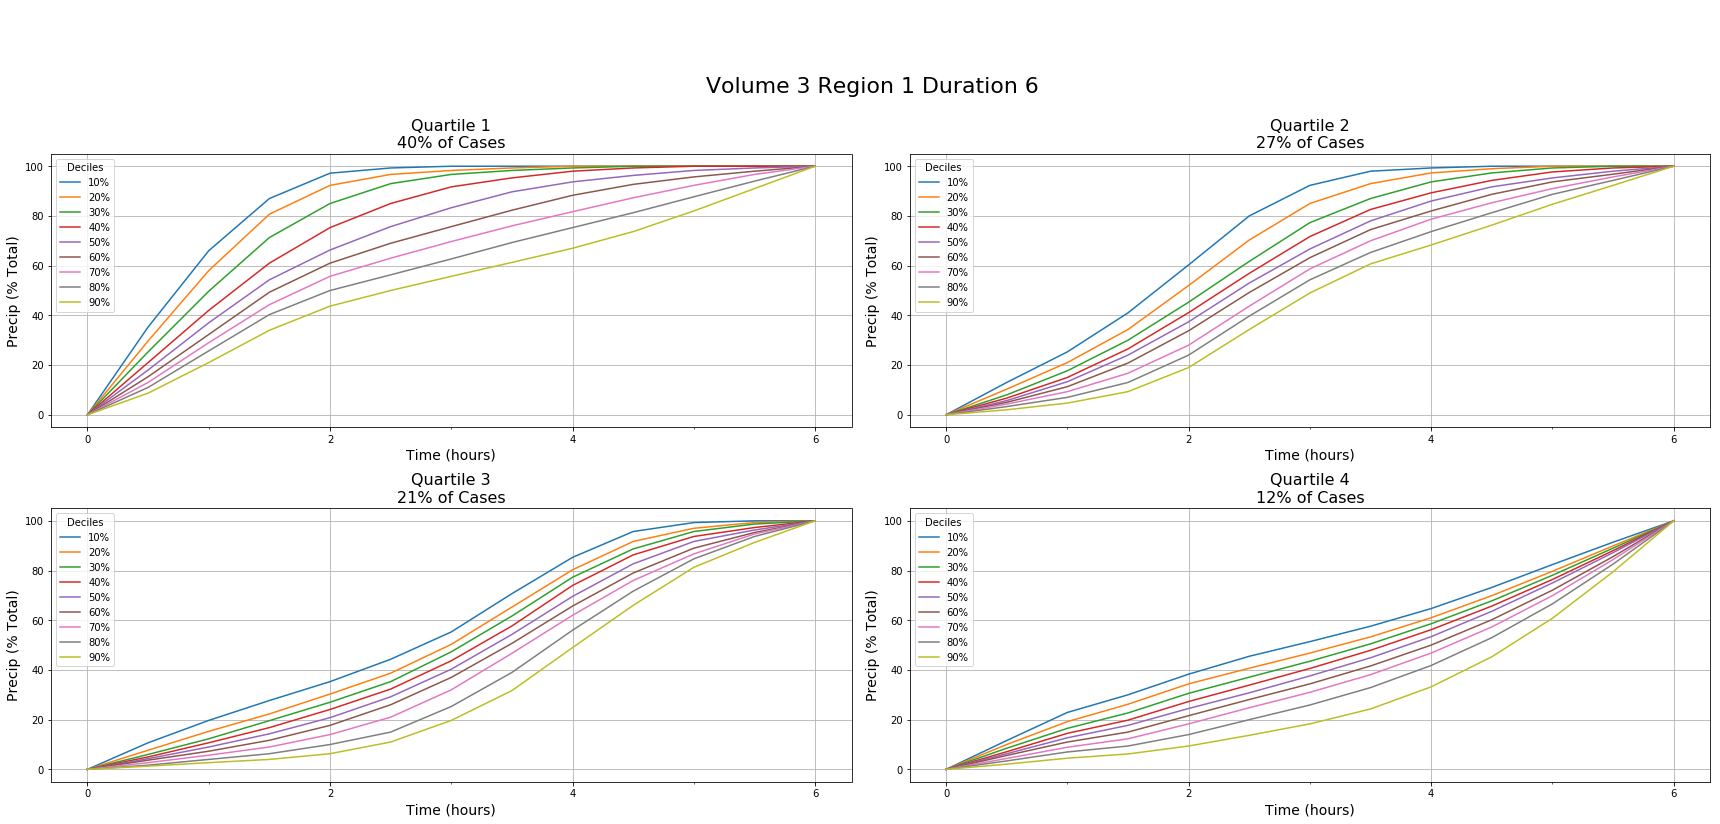

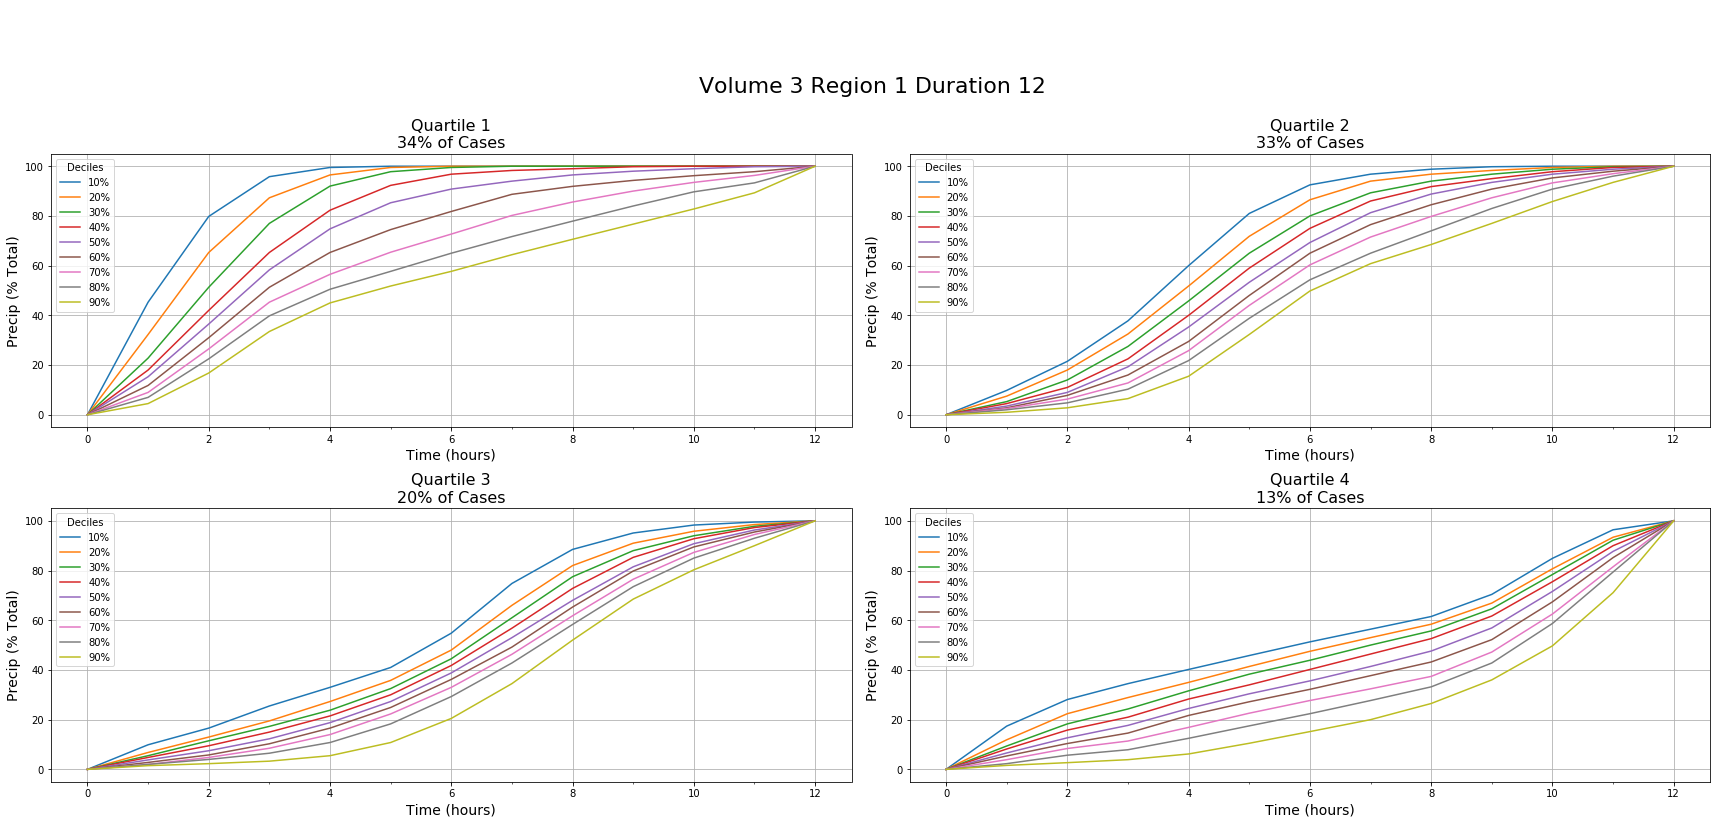

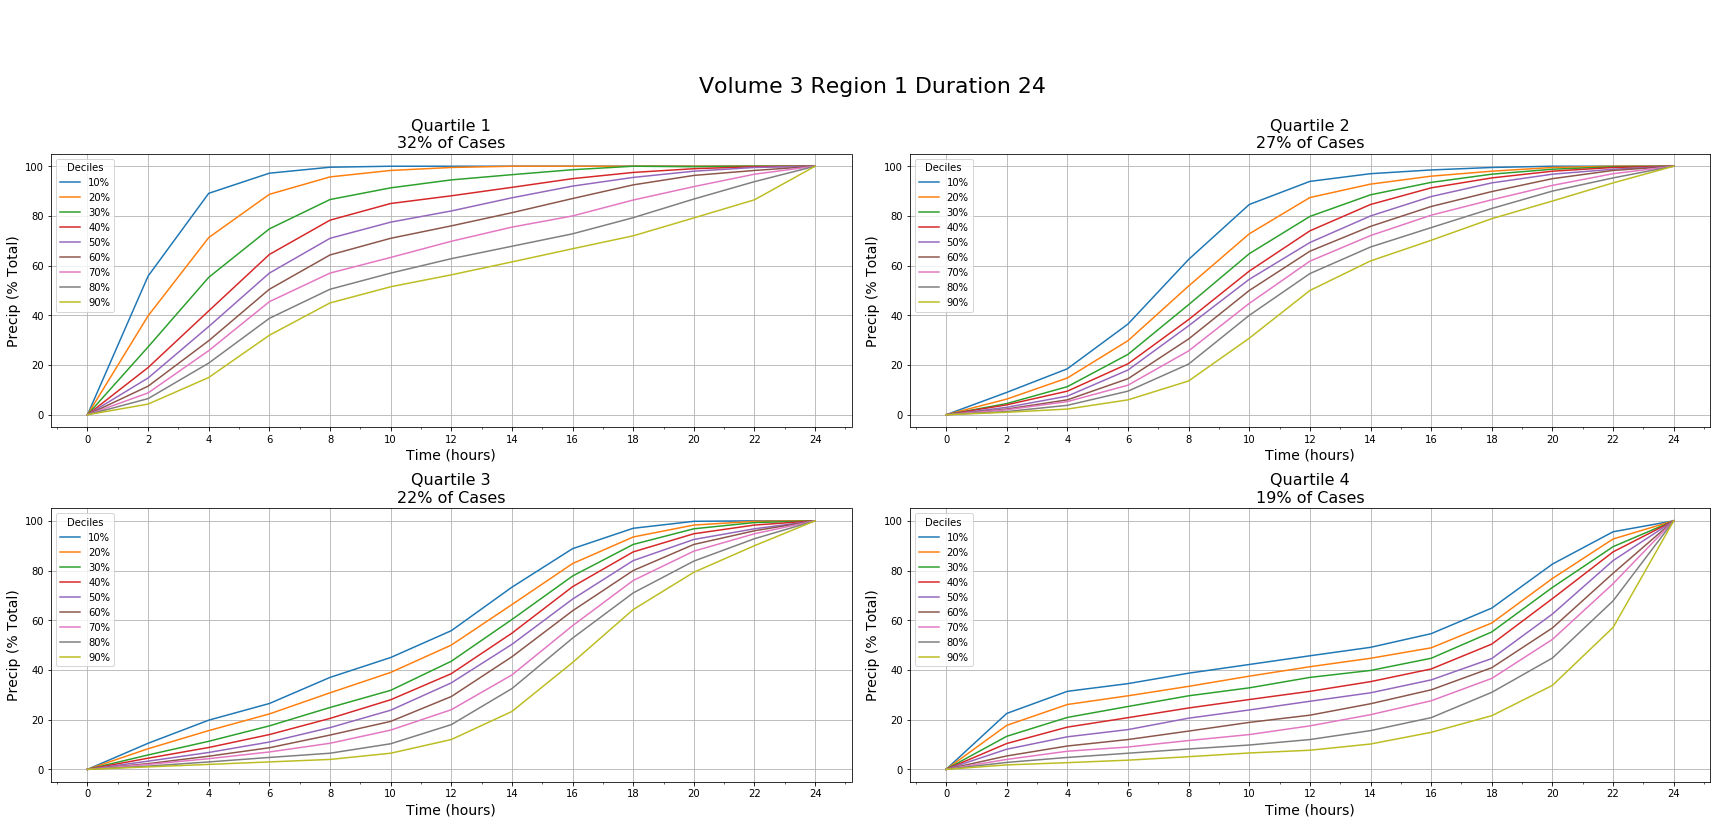

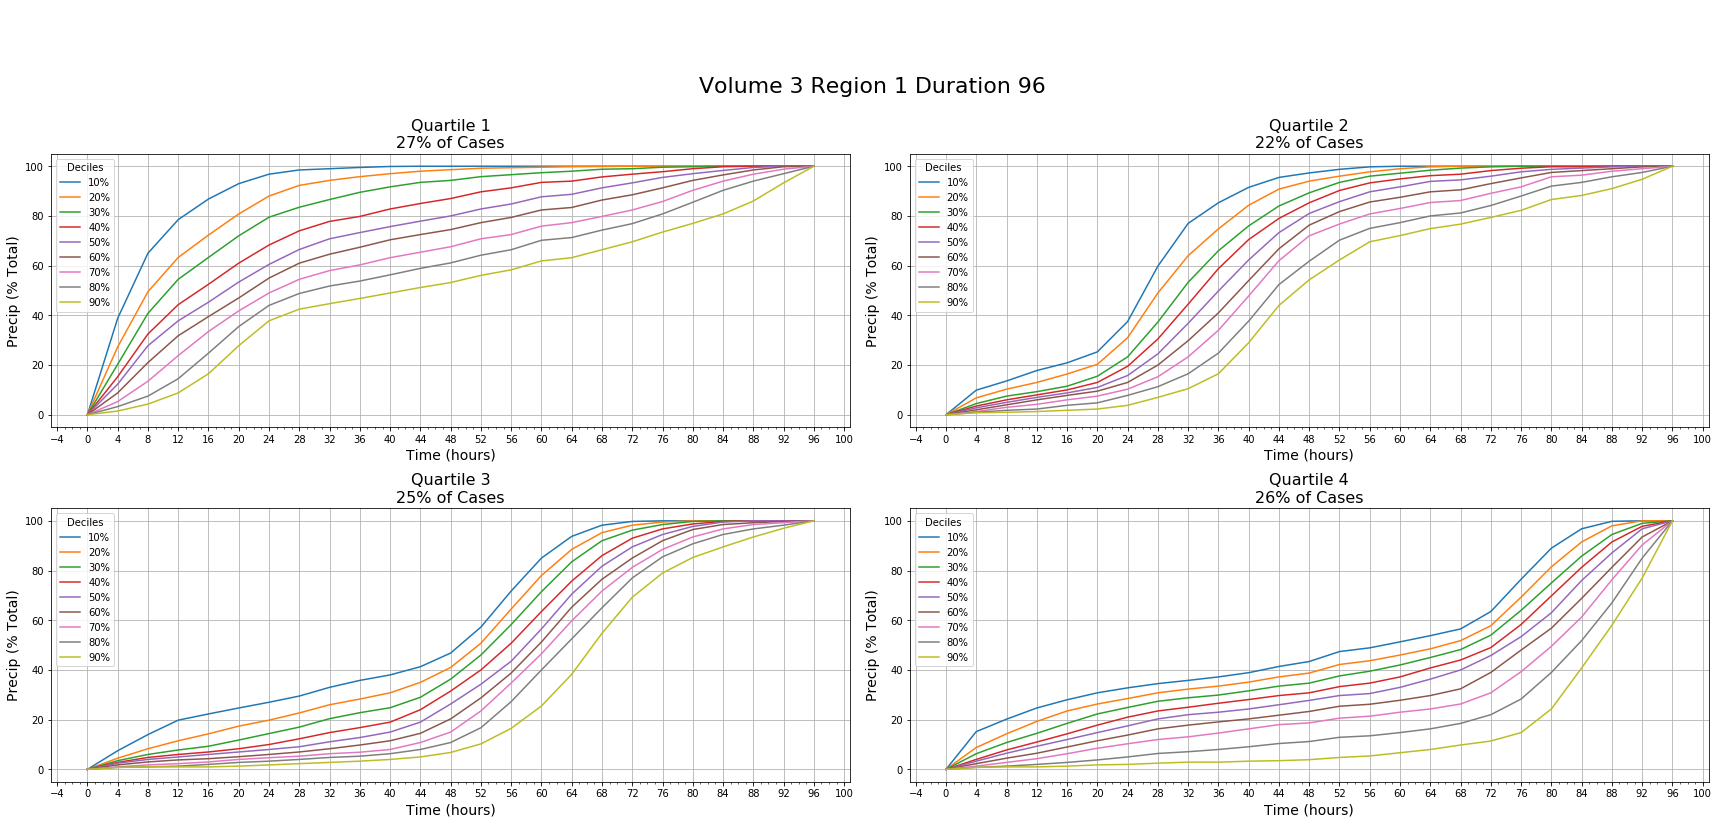

In [4]:
for vol in parameters['volume']:
    for reg in parameters['region']:
        for dur in parameters['duration']:
            qmap          = get_temporal_map(data_dir, datamap, vol, reg, dur, display_print)
            raw_temporals = get_temporals(temporals, vol, reg, dur, qmap, display_print)
            qrank         = get_quartile_rank(data_dir, qranks, vol, reg, dur, display_print)
            curve_group   = get_quartiles(raw_temporals, dur, qrank, qmap, vol, reg, plot = display_plots)    

---

## END